# Pandas Review and Lesson 4 Pre-Work

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plot within the jupyter notebook
%matplotlib inline
# Basically, the HD version, if you have a retina screen
%config InlineBackend.figure_format = 'retina'
# Emulates the graphing style based off of the style you use
# Other examples styles: seaborn-deep, seaborn-pastel, seaborn-white, dark_background, bmh, ggplot
plt.style.use('fivethirtyeight')

In [3]:
df = pd.read_csv('/Users/melaniequalls/Desktop/DataScienceGA/DS-SF-32/dataset/titanic.csv')

## Group By

Typically, this is one of the most difficult concepts to grasp, but is one of the most important functions to use for EDA (Exploratory Data Analysis).

DataFrame.groupby('Col')[['Col']].AGGRETATE_FUNCTION

Within the .groupby() is the column you want to group together. If you are only grouping by 1 col, you don't need square brackets, but if you are grouping by more than 1 col, you must use square brackets. The reasoning is .groupby(by=) can take a list or a series.

The double brackets afterwards can be confusing as well. Remember, [] returns a series and [[]] returns a dataframe. If you were to use [] brackets, regardless if you only want to show 1 col, the group by will only return a series and not a dataframe. You must use a [[]] to return a full dataframe. Of course, if you don't have specific columns you only want to look at, you can leave it blank and it'll return the whole dataset.

All groupby functions must be chained with an aggregate function or it will return you an object.

I did a quick example below using the titanic dataset.

In [4]:
df.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Without Aggregate Function
df.groupby('sex')

In [8]:
# With Aggregate
df.groupby('sex').mean()

,survived,pclass,age,sibsp,parch,fare
sex,,,,,,
female,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


In [10]:
# Single Square Bracket - groups by then returns the aggregated value of the bracketed column as a series
df.groupby('survived')['age'].mean()

survived
0    30.626179
1    28.343690
Name: age, dtype: float64

In [12]:
# Double Square Bracket - groups by then returns the aggregated value of the bracketed column as a dataframe
df.groupby('survived')[['age']].mean()

,age
survived,
0,30.626179
1,28.343690


In [13]:
# Multiple Groups with 2 Important Features
df.groupby(['survived', 'pclass'])[['age', 'fare']].mean()

age       fare
survived pclass                      
0        1       43.695312  64.684008
         2       33.544444  19.412328
         3       26.555556  13.669364
1        1       35.368197  95.608029
         2       25.901566  22.055700
         3       20.646118  13.694887

## Plotting

Plotting is frustrating. It takes repetition and experience to get it the way you want it, and even then, you will have to read and re-read the documentations to figure out what you want exactly.

Personally, I prefer matplotlib because it has the most customizations, but also has the highest learning curve. Seaborn is a more straightforward package to use, and in some graphs, is much stronger than matplotlib, most notably, correlation heat maps and pair plots. I haven't experimented with ggplot2 enough to comment on it, but it is supposedly a near replica of R's version of ggplot2. I recommend being able to use and understand at least both of these packages because if you can't get one graph to work in one package, you can always switch to the other.

I'll give a quick overview of how to make a quick scatter plot and the differences between matplotlib and seaborn.

Typically, it is good practice to generate your own graphing dimensions and axes before doing any sort of plotting. Although, it is also unnecessary since the plots will still work without them.

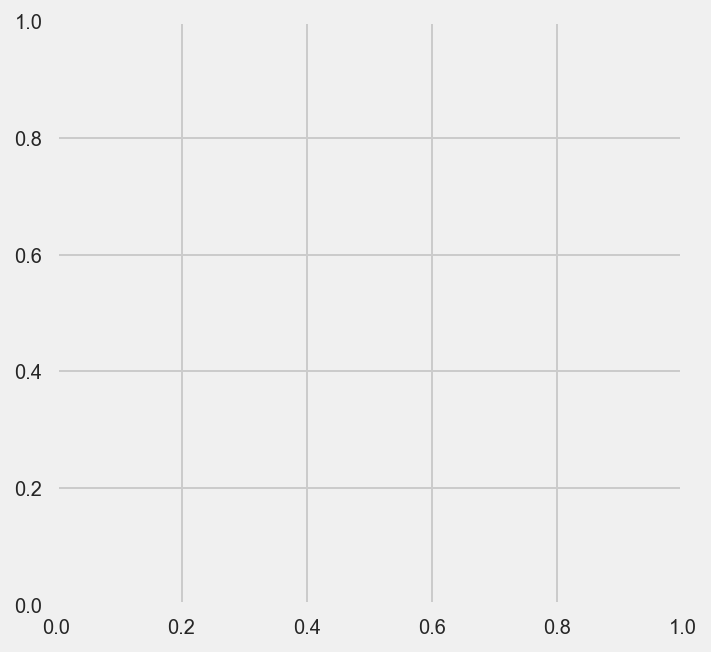

In [17]:
# Generates an inch-by-inch dimension where you can put your graph in
fig = plt.figure(figsize=(5,5))
# Gets (prints) current axes, creating one if needed. It is only equivalent in the simplest 1 axes case.
ax = fig.gca()

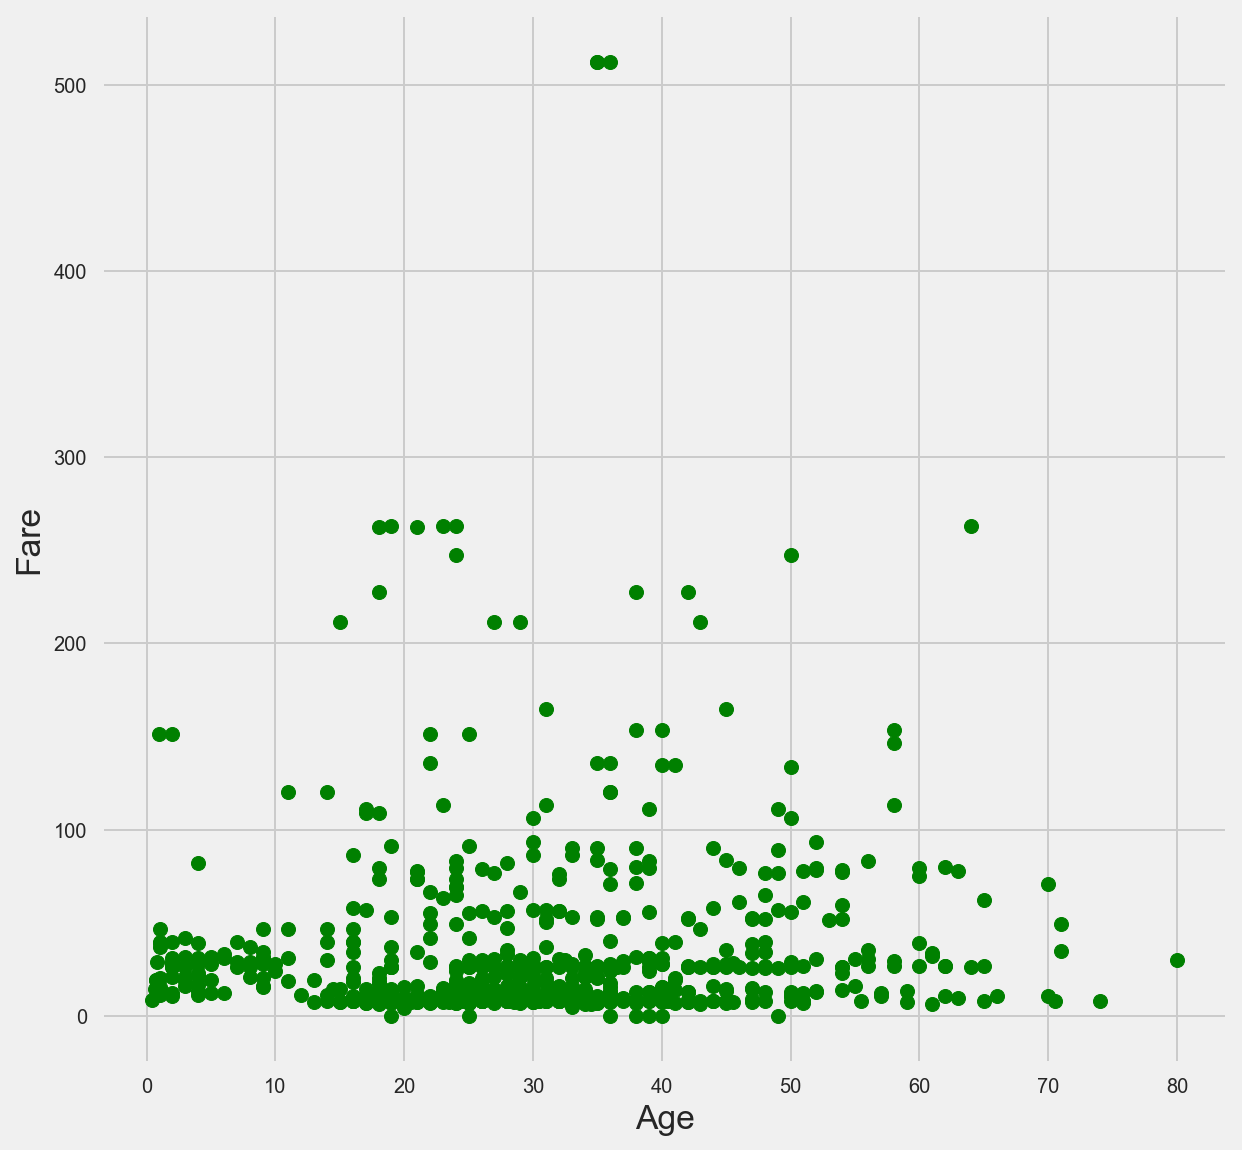

In [18]:
fig = plt.figure(figsize=(9,9))
ax = fig.gca()
# Since the dimensions and axes are defined, we can now plot our scatter plot

# Matplotlib
ax.scatter(x='age', y='fare', data=df, c='green')
ax.set_ylabel('Fare')
ax.set_xlabel('Age')

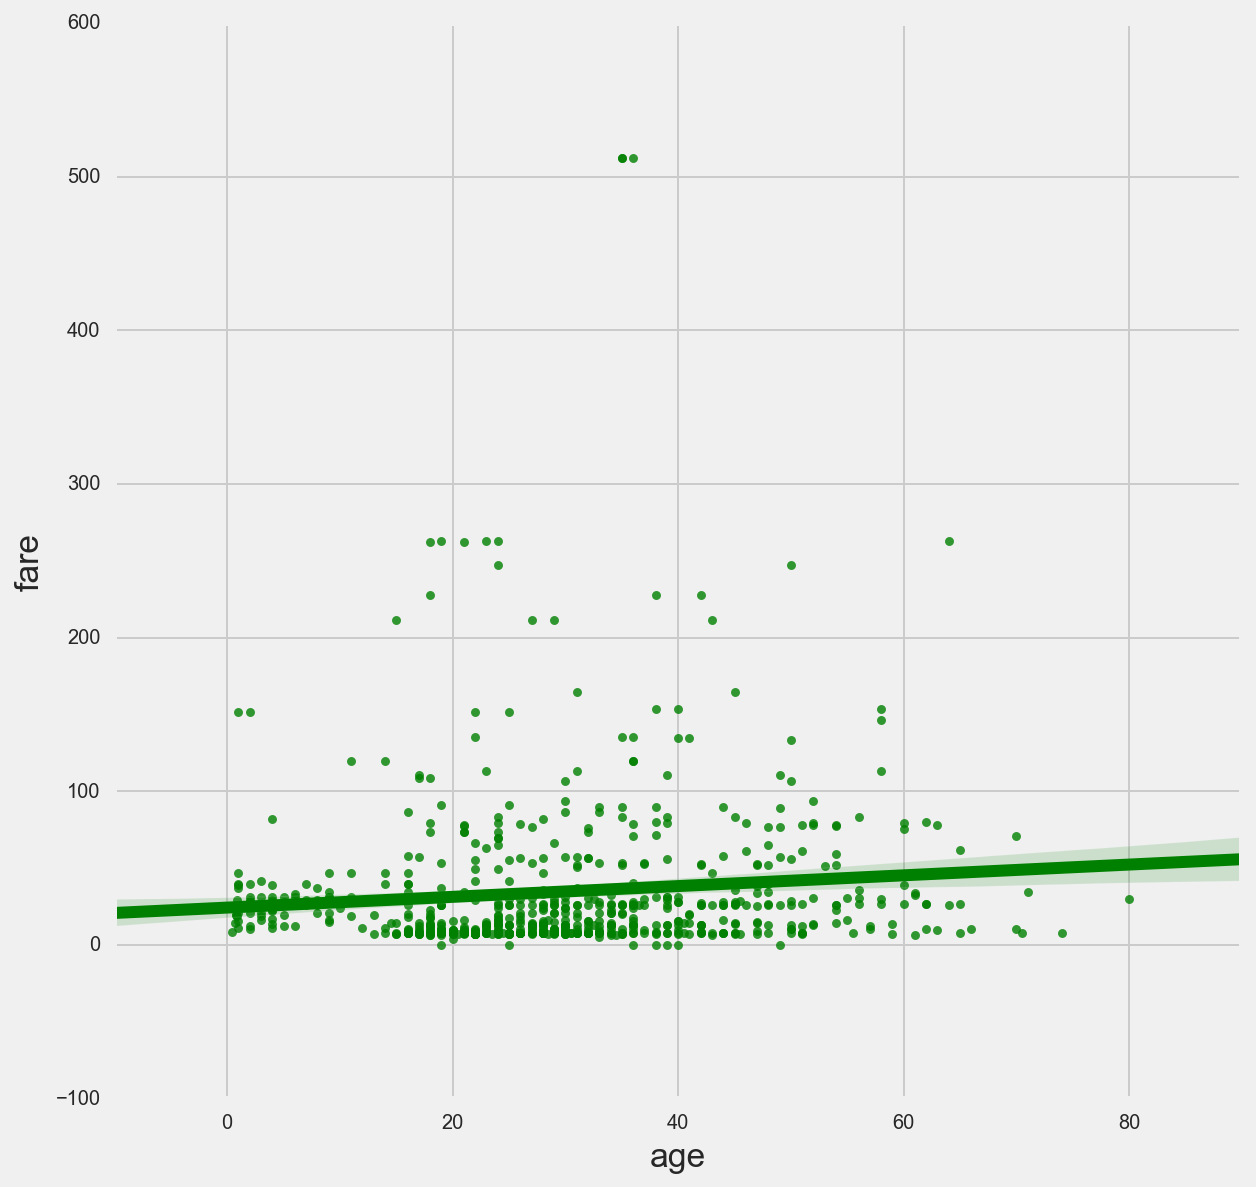

In [48]:
# Seaborn
fig = plt.figure(figsize=(9,9))
ax = fig.gca()

ax = sns.regplot(x='age', y='fare', data=df, color='green')

As you may notice, seaborn does a lot more with less code. It also plots a best fit line, which you can turn on and off with the parameter fit_reg=False. If you wanted a best fit line with matplotlib, you would need to plot another line into the same dimensions and axes in order for it to work.

# Lesson 4 Topics
1. Differences between Causation vs Correlation
2. Test a hypothesis within a sample study
3. Validate your findings using statistical analysis (p-values, confidence intervals)

# Correlation vs Causation

Two Features that are correlated is usually a good thing in statistics. However, if the features don't explain each other, then they are useless. If People Taking Walks has a high positive correlation with People who watch Game of Thrones, we can't come to any useful conclusion.

Tyler Vigen makes fun of high correlation with no causation on his website, which I linked below. It is a great way to understand correlation does not equate to causation.

http://www.tylervigen.com/spurious-correlations

# Hypothesis Testing

You are training to be a Data Scientist, you need a hypothesis to test. How do you create a good hypothesis? A good hypothesis has to be specific. It has to explicitly explain what you are trying to improve or test and what parameters you are including.

Usually how I interpret the differences between a Null and Alternate Hypothesis is:
- Null Hypothesis - The Devil's Advocate, there's no difference
- Alternate Hypothesis - What you believe is happening

#### Examples of BAD hypothesis
1. If our product was smaller, women would pay more to purchase it.
	- What product?
	- How much smaller?
	- How much more would the women pay?
	- Lack of control group between women using the original and the smaller product
    
2. Version "C" of our landing page is unfriendly and people are less likely to click through than on version "A" or "B".
	- What is unfriendly mean? Why?
	- How much less likely?
	- What are the issues with "C" that produces fewer clicks?
	- What makes version "A" or "B" more likely to produce more clicks?
    
3. Splitting this app into multiple versions with tiered pricing and functionality will result in higher revenue.
	- How are we going to do this? Is this testable? How much money or time required?
	- This may not even have a result
    
#### Example of a GOOD Hypothesis
Google+ would see an increase usage rate of 10% with a new landing page that does not require a forced login and links all the user's social media and contact data on 1 page.

Some good practices when creating a Hypothesis
1. Make sure that your time and work is scheduled well because when your time is up, your time is up.
2. Reproducibility is very important, make sure that your models work multiple times, instead of 1 time.
3. Randomization is very important because if the values are not randomized, your statistical theories and models will fall apart.

# Validate your findings using statistical analysis

Below I will link some good reads for definitions. This should prepare you for statistical analysis in class.

#### P-Value
http://blog.minitab.com/blog/adventures-in-statistics-2/how-to-correctly-interpret-p-values
#### Significance Level (Alpha) and Statistically Significant
http://blog.minitab.com/blog/adventures-in-statistics-2/understanding-hypothesis-tests:-significance-levels-alpha-and-p-values-in-statistics
#### What is a Confidence Interval?
http://stattrek.com/estimation/confidence-interval.aspx